In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
import matplotlib.pyplot as plt
from tools import load_data
from models import Bernoulli_Naive_Bayes

In [2]:
XwindowsDocData = 1

if XwindowsDocData == 1:
    data = load_data('XwindowsDocData.mat')
    x_train = data['xtrain'].toarray()
    y_train = data['ytrain'] - 1
    x_test = data['xtest'].toarray()
    y_test = data['ytest'] - 1
else:
    data = load_data('20news_w100.mat')['documents'].toarray()
    np.random.shuffle(data)
    x_train = data[0:60, :]
    x_test = data[61:, :]

In [3]:
clf = Bernoulli_Naive_Bayes()
clf.fit(x_train, y_train)
y_pred, prob = clf.predict(x_test)
# Error rate
np.sum(y_pred.reshape(-1, 1) == y_test) / y_test.shape[0]

0.8133333333333334

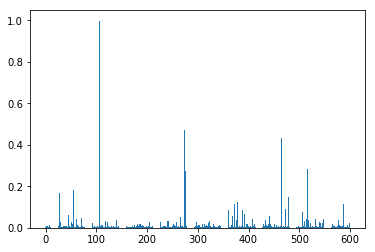

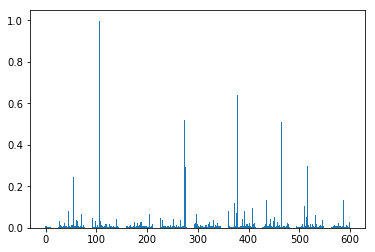

In [4]:
for c in np.unique(y_test):
    plt.figure(201 + (c+1)*10)
    plt.bar([i for i in range(x_train.shape[1])], clf.theta[c, :])
plt.show()